In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

df = pd.read_csv(r'C:\Users\hp\Desktop\projects\agro-scan\data.csv')

In [2]:
df.head()

,Region,Nitrogen_N_mg/kg,Phosphorus_P_mg/kg,Potassium_K_mg/kg,Temperature_C,Humidity_%,Rainfall_mm,Soil_Moisture_%,LDR
0,Punjab,750.965158,28.193154,191.991431,24.48,53.64,3.09,27.844360,365.137699
1,Punjab,784.305016,27.764688,254.701099,21.31,53.20,16.07,34.519483,405.474674
2,Punjab,794.938568,15.758590,149.447401,25.24,33.07,4.60,26.836535,395.051534
3,Punjab,992.682541,32.693723,182.747921,29.62,55.05,23.10,35.164865,401.877272
4,Punjab,686.475356,8.605565,201.999587,20.83,70.99,40.76,24.459244,310.713560


### Visualizing Correlation:

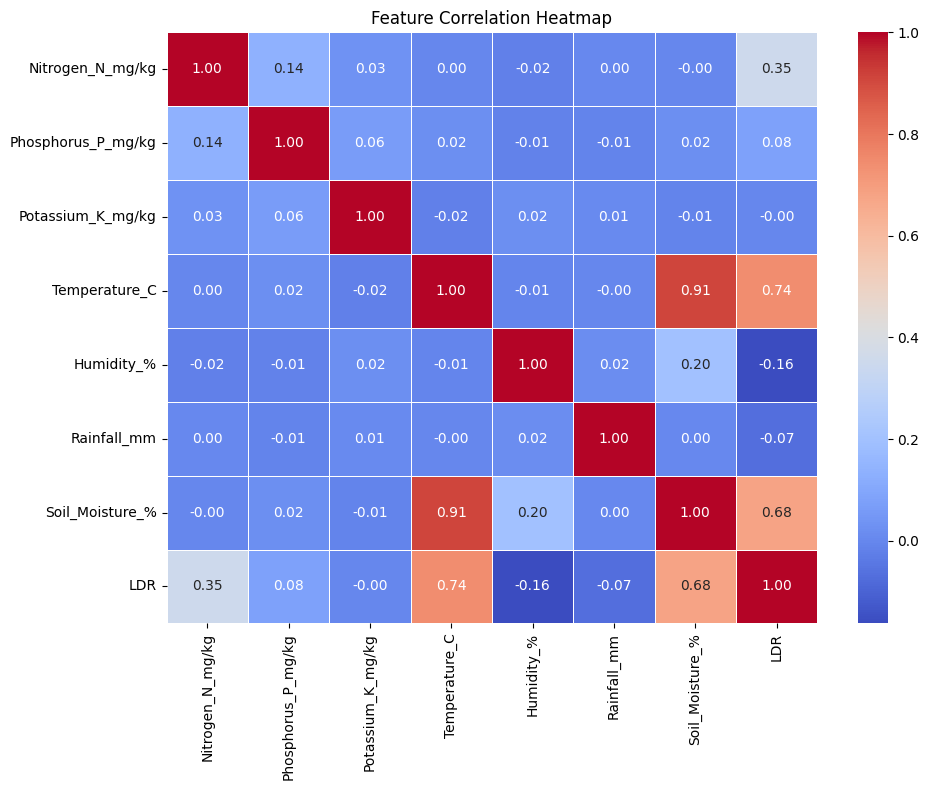

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

### Splitting Data:

In [2]:
X = df[['Nitrogen_N_mg/kg', 'Phosphorus_P_mg/kg', 'Potassium_K_mg/kg',
        'Temperature_C', 'Humidity_%', 'Rainfall_mm', 'Soil_Moisture_%']]

y = df['LDR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training Model:

In [3]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [4]:
y_pred = gbr.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [7]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R² Score): {r2:.2f}")

Mean Squared Error (MSE): 290.55
R-squared (R² Score): 0.71


- The model explains 71% of the variance in LDR. That’s strong performance for a natural system, especially given the moderate complexity of features.

### Making Predictions:

In [8]:
sample_data = pd.DataFrame([{
    'Nitrogen_N_mg/kg': 720,
    'Phosphorus_P_mg/kg': 25,
    'Potassium_K_mg/kg': 180,
    'Temperature_C': 26.5,
    'Humidity_%': 50,
    'Rainfall_mm': 10,
    'Soil_Moisture_%': 30
}])

predicted_ldr = gbr.predict(sample_data)[0]

print(f"Predicted LDR (Crop Yield Estimate): {round(predicted_ldr, 2)}")

Predicted LDR (Crop Yield Estimate): 358.48


### Storing Model:

In [6]:
joblib.dump(gbr, 'yield-estimate-model.pkl')

['yield-estimate-model.pkl']